6
    6.1 ---------- (1pt) ++
    -text ans.           ++
    6.2 ---------- (2pt) ++

7
    7.1 ---------- (1pt) ++
    7.2 ----------       ++
    7.3 ----------       ++
    7.4 ----------       ++
    7.5 ----------       ++
    7.6 ---------- (1pt) ++
8
    8.1 ---------- (1pt) ++
    8.2 ----------       ++
    8.3 ---------- (1pt) ++

9
    9.1 ---------- (1pt) ++
    9.2 ---------- (1pt) ++
    9.3 ---------- (2pt) +-
    9.4 ----------       --
    9.5 ----------       --
    9.6 ----------       --

# Home Assignment No. 2 - part two

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


## Task 6. Deep ANNs. (3 points)

-  **(1 pt.)** Activation functions; **(sub tasks 6.1)**
-  **(2 pt.)** MNIST classification.  **(sub tasks 6.2)**



### Task 6.1  Activation functions. 
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch implementation and their derivatives using [autograd](https://pytorch.org/docs/stable/autograd.html) functionality `grad()`:
   
1. Plot `ReLU`, `ELU` ($\alpha = 1$), `Softplus` ($\beta = 1$) and `Sign`, `Sigmoid`, `Softsign`, `Tanh`.


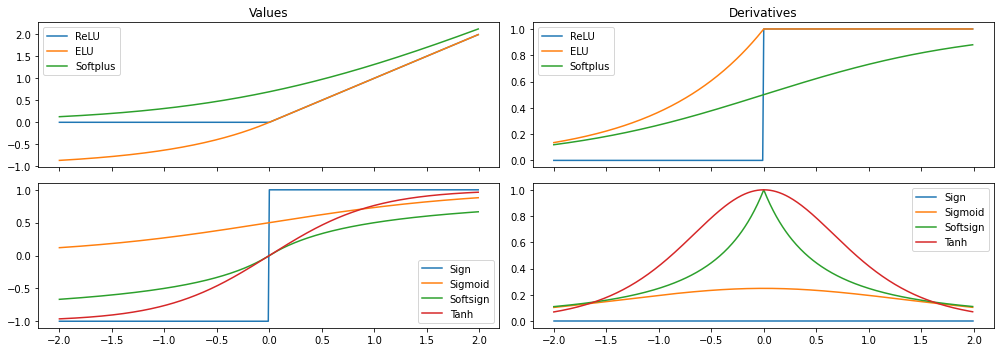

In [134]:
%matplotlib inline
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch

x = torch.arange(-2, 2, .01, requires_grad=True)
x_np = x.detach().numpy()
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(14, 5))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution

        # zero grad
        x.grad *= 0

        # activation function
        y = activation(x)
        y.sum().backward()

        # y to numpy array
        y_np = y 
        y_np = y_np.detach().numpy()

        # grad of x to numpy
        grad = x.grad
        grad = grad.detach().numpy()

        # plot results
        axes[i, 0].plot(x_np, y_np, label = function_name)
        axes[i, 1].plot(x_np, grad, label = function_name)

        ### END Solution

    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

Which of these functions may be, and which - definitely, are a poor choise as an activation function in a neural network? Why? Do not forget that output of the current layer servers as an input for the following one. Imagine a situation where we have many layers, what happens with the activation values?







In [135]:
# BEGIN SOLUTION (do not delete this comment!)

torch.manual_seed(0) # for reproducibility

# *   ReLU:       More good than bad choice.
                  # Non-limited range of values (from 0 to +inf) (+-)
                  # The gradient in the negative area is zero, so the weights will not be corrected during the gradient descent. (-)
                  # ReLu is less computationally intensive than Tanh or Sigmoid. (+)
                  # ReLU does not fix the gradient tearing issue. (-)
                  # ELU does not fix dead gradient problem (-)

# *   ELU:        More good than bad choice.
                  # Greater computational complexity than ReLU. (-)
                  # ELU does not fix the gradient tearing issue. (-)
                  # ELU fixes dead gradient problem. (+)

# *   Softplus:   More good than bad choice.
                  # Smooth function, non-zero gradient everywhere. (+)
                  # Softplus does not fix the gradient tearing issue. (-)
                  # Softplus fixes dead gradient problem. (+)

# *   Sign:       Definetly bad choice.
                  # Zero gradient everywhere, it has 2 states: 0 and 1, without any intermediate value. (-)

# *   Sigmoid:    More good than bad choice. (similar to Tanh)
                  # Smooth function, non-zero gradient everywhere, limited range of values (2 asymptotes: y = 0, y = 1). (+-)
                  # But sensitivity decreases when input -> +inf/-inf and gradient for these values is about zero. (-)
                  # It has only positive values. (+-)
                  # Lower gradient values in comparsion with Tanh. (+-)

# *   Tanh:       More good than bad choice. (similar to Sigmoid)
                  # Smooth function, non-zero gradient everywhere, limited range of values (2 asymptotes: y = -1, y = 1). (+-)
                  # But sensitivity decreases when input -> +inf/-inf and gradient for these values is about zero. (-)
                  # It has both positive and negative values. (+-)
                  # Hihger gradient values in comparsion with Sigmoid. (+-)

#END SOLUTION (do not delete this comment!)

### Task 6.2 MNIST classification. 

At one of the seminars we have discussed an MLP (Multilayer perceptron) with one hidden layer, logistic activation functions and softmax. In this task, you are to:

1. Implement the MLP modules, including the Softmax cross entropy between `logits` and `labels` using numpy.

2.  Train your numpy realization of MLP to classify the MNIST from `sklearn.datasets()`. The required accuracy on validation is `> 90%`.

3.  Compare the acccuracy of classification to your scores from `Part 1` with and without dimensionality reduction. Is this comparison fair?:) Derive the confusion matrix for all digits classes. Which digits are predicted better or worse than others, why?

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [137]:
# fetch the dataset.
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]
test_size = digits_test.shape[0]

input_size = 8*8
classes_n = 10

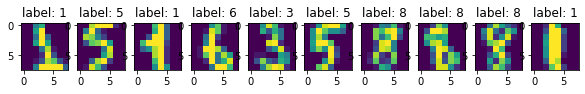

In [138]:
N = 10

sample_idx = np.random.choice(1797, N, replace=False)
digits_sample = digits[sample_idx]
targets_sample = targets[sample_idx]
f, ax  = plt.subplots(1,10, figsize=(10, 5))

for i in range(N):
    ax[i].imshow(digits_sample[i].reshape(8,8))
    ax[i].set_title('label: '+str(targets_sample[i]))


A short recap on what we are going to achieve here.
<br>
1. Forward pass:
$$
h_1 = X\theta_1+\beta_1
$$

$$
O_1 = sig(h_1)
$$

$$
h_2 = O_1\theta_2+\beta_2
$$
$$
O_2 = softmax(h_2)
$$
$$
Loss = CrossEntropy(O_2, true \space labels)
$$

2. Compute gradients: 

To update weights first we need to compute loss gradients with respect to $\theta_1$ and $\theta_2$ and then update both $\theta$ and $\beta$.

$$
\frac{ \partial{loss} }{\partial{\theta_2}} = \frac{ \partial{loss} }{\partial{O_2}}\frac{ \partial{O_2} }{\partial{h_2}}\frac{ \partial{h_2} }{\partial{\theta_2}}
$$
Note, that $\frac{ \partial{h_2} }{\partial{\theta_2}}=O_1$, so we can cache this value during forward pass to speed up our computation.
$$
\frac{ \partial{loss} }{\partial{\theta_1}} = \frac{ \partial{loss} }{\partial{O_2}}\frac{ \partial{O_2} }{\partial{h_2}}\frac{ \partial{h_2} }{\partial{O_1}}\frac{ \partial{O_1} }{\partial{h_1}}\frac{ \partial{h_1} }{\partial{\theta_1}}
$$
Note, that $\frac{ \partial{h_1} }{\partial{\theta_1}}=X$.

Since we are using sigmoid avtivation function here and
$$
\frac{ \partial{sig} }{\partial{h}} = sig(h)(1 - sig(h))
$$
It also makes sense to cache sig(h) during forward pass.

3. Update weights:

$\theta:= \theta -  \frac{ \partial{loss} }{\partial{\theta}}\alpha$, where $\alpha$ is some learning rate.

Note, it was not shown here how to update and compute $\beta$ but you can do it!

### Implement the MLP with backprop

In [139]:
### YOUR TASK STARTS HERE ###

#Here you should implement by yourself MLP class and its constituents including forward and backward propagation methods

class Linear:
    def __init__(self, input_size, output_size):
        # Trainable parameters of the layer and their gradients
        self.thetas = np.random.randn(input_size, output_size) # the weight matrix of the layer (W)
        self.thetas_grads = np.empty_like(self.thetas) # gradient w.r.t. the weight matrix of the layer
        self.bias = np.random.randn(output_size) # bias terms of the layer (b)
        self.bias_grads = np.empty_like(self.bias) # gradient w.r.t. bias terms of the linear layer

    def forward(self, x): 
        # keep x for backward computation
        self.x = x
        output = np.matmul(x, self.thetas) + self.bias
        return output
    
    def backward(self, output_grad, learning_rate):
        """
        Calculate and return gradient of the loss w.r.t. the input of linear layer given the input x and the gradient 
        w.r.t output of linear layer. You should also calculate and update gradients of layer parameters.
        :param x: np.array, input tensor for linear layer;
        :param output_grad: np.array, grad tensor w.r.t output of linear layer;
        :return: np.array, grad w.r.t input of linear layer
        """
        
        # BEGIN SOLUTION (do not delete this comment!)

        # calculate input_grad value
        input_grad = np.matmul(output_grad, self.thetas.T)
        # update thetas_grads
        self.thetas_grads = np.matmul(self.x.T, output_grad)
        # update bias_grads
        self.bias_grads = output_grad.reshape((-1))

        # END Solution (do not delete this comment!)
        
        return input_grad

    def step(self, learning_rate):
        self.thetas -= self.thetas_grads * learning_rate
        self.bias -= self.bias_grads * learning_rate

class LogisticActivation:
    def __init__(self):
        # the layer has no parameters
        pass 
        
    def sig(self, x):
        return 1/(1 + np.exp(-x))

    def forward(self, x):
        # keep o for backward computation
        self.o = self.sig(x)
        return self.o 


    def backward(self,  output_grad, learning_rate=None):
        """
        Calculate and return the gradient of the loss w.r.t. the input
        of logistic non-linearity (given input x and the gradient 
        w.r.t output of logistic non-linearity).
        
        :param x: np.array, input tensor for logistic non-linearity;
        :param output_grad: np.array, grad tensor w.r.t output of logistic non-linearity;
        :return: np.array, grad w.r.t input of logistic non-linearity
        
        """
        
       # BEGIN SOLUTION (do not delete this comment!)

        sigma = self.o # there is no x as input
        input_grad = sigma * output_grad * (1 - sigma)

        ### END Solution (do not delete this comment!)
        
        return input_grad


class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        h1 = self.linear1.forward(x)
        h1a = self.activation1.forward(h1)
        out = self.linear2.forward(h1a)
        return out

    def backward(self, output_grad, learning_rate):
        """
        Calculate and return the gradient of the loss w.r.t. the input of MLP given the input and the gradient 
        w.r.t output of MLP. You should also update gradients of paramerters of MLP layers.
        Hint - you should chain backward operations of modules you have already implemented. You may also
        need to calculate intermediate forward results.
        
        :param x: np.array, input tensor for MLP;
        :param output_grad: np.array, grad tensor w.r.t output of MLP;
        :return: np.array, grad w.r.t input of MLP
        """
 
        # BEGIN SOLUTION (do not delete this comment!)
        
        # output gradient for linear2 layer
        out_grad_linear2 = self.linear2.backward(output_grad = output_grad, learning_rate = 0)
        # output gradient for activation function
        out_grad_activation1 = self.activation1.backward(output_grad = out_grad_linear2, learning_rate = 0)
        # output gradient for linear1 layer
        out = self.linear1.backward(output_grad = out_grad_activation1, learning_rate = 0)

        # END Solution (do not delete this comment!)
        

        return  out


In [140]:
# BEGIN SOLUTION (do not delete this comment!)

def softmax_crossentropy_with_logits(logits, reference_answers): 

    targ_val = np.zeros_like(logits)
    targ_val[np.arange(logits.shape[0]), reference_answers] = 1

    preds = np.exp(logits) / np.exp(logits).sum(axis = 1, keepdims = True) # calculate soft max
    loss = - (targ_val * np.log(preds).sum(axis = 1)).mean() # calculate cross-entropy

    ### END Solution
    return loss

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    
    targ_val = np.zeros_like(logits)
    targ_val[np.arange(logits.shape[0]), reference_answers] = 1
    
    grad = (np.exp(logits) / np.exp(logits).sum(axis = 1)) - targ_val # calculate (softmax - target)

    return grad # >>> your solution here <<<

# BEGIN Solution

In [141]:
np.random.seed(42)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 100
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-2

for epoch in range(epochs_n):
    
    y_pred = []

    for sample_i in range(train_size):
        x = x_train[sample_i].reshape((1, -1))
        target = np.array([y_train[sample_i]])

        ### BEGIN Solution

        # zero gradients
        mlp.linear1.thetas_grads = 0
        mlp.linear2.thetas_grads = 0
        mlp.linear1.bias_grads = 0
        mlp.linear2.bias_grads = 0

        # ... perform forward pass and compute the loss
        logits = mlp.forward(x)
        loss = softmax_crossentropy_with_logits(logits, target)

        # ... compute the gradients w.r.t. the input of softmax layer
        grad = grad_softmax_crossentropy_with_logits(logits, target)

        # ... perform backward pass
        mlp.backward(output_grad = grad, learning_rate = 0)

        # ... and update the weights with weight -= grad * learning_rate
        mlp.linear1.step(learning_rate = learning_rate)
        mlp.linear2.step(learning_rate = learning_rate)

        # >>> your solution here <<<

        ### END Solution

        y_pred.extend(logits.argmax(1))

    if epoch % 10 == 0:
        
        y_pred_test = []

        for sample_i in range(test_size):
            x = x_test[sample_i].reshape((1, -1))
            target = np.array([y_test[sample_i]])
            
            logits = mlp.forward(x)
            y_pred_test.extend(logits.argmax(1))

        print('Starting epoch {}'.format(epoch), \
              ', Loss : {:.3}'.format(loss), \
              ', Accuracy on train: {:.3}'.format(accuracy_score(y_train, y_pred)), \
              ', Accuracy on test: {:.3}'.format(accuracy_score(y_test, y_pred_test)) )
        


Starting epoch 0 , Loss : 2.4 , Accuracy on train: 0.103 , Accuracy on test: 0.0667
Starting epoch 10 , Loss : 2.41 , Accuracy on train: 0.625 , Accuracy on test: 0.649
Starting epoch 20 , Loss : 2.51 , Accuracy on train: 0.821 , Accuracy on test: 0.807
Starting epoch 30 , Loss : 2.68 , Accuracy on train: 0.875 , Accuracy on test: 0.871
Starting epoch 40 , Loss : 2.9 , Accuracy on train: 0.9 , Accuracy on test: 0.889
Starting epoch 50 , Loss : 3.14 , Accuracy on train: 0.911 , Accuracy on test: 0.904
Starting epoch 60 , Loss : 3.37 , Accuracy on train: 0.92 , Accuracy on test: 0.924
Starting epoch 70 , Loss : 3.59 , Accuracy on train: 0.927 , Accuracy on test: 0.931
Starting epoch 80 , Loss : 3.79 , Accuracy on train: 0.929 , Accuracy on test: 0.931
Starting epoch 90 , Loss : 3.98 , Accuracy on train: 0.936 , Accuracy on test: 0.933


In [9]:
# BEGIN SOLUTION (do not delete this comment!)
     
# confusion matrix
true = y_test # get true values
pred = mlp.forward(x_test) # make predictions
# plot confusion matrix
confusion_matrix(y_true = true, y_pred = np.argmax(pred, axis=1))

# END Solution (do not delete this comment!)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  2,  0,  0,  2],
       [ 0,  1, 41,  1,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  4,  1,  0,  0,  1,  0,  1, 41,  0],
       [ 0,  0,  0,  4,  0,  2,  0,  0,  1, 40]])

## Task 7. Autoencoders on tabular data (2 points)
**From now on we will be using pytorch for all the tasks.**

We will build a latent representation for tabular data with simple Autoencoder (AE). We are going to work with the cancer dataset from scikit-learn package. You are to follow the instructions.  

1. **(1 pt.)**  Implement AE modules for tabular data. Train AE to get latent representation of the cancer dataset from `sklearn.datasets()`. Use `MSE` loss and get < $0.3$ on validation, with AE "bottleneck" = $2$;   **(sub tasks 7.1 - 7.5)**

2. **(1 pt.)** Plot the latent representation of whole dataset in 2D, use colors to show object of different classes. **(sub tasks: 7.6)**


In [142]:
# imports

import torch
import torch.nn as nn
import torch.utils.data as torch_data

import sklearn.datasets as sk_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


#### 7.1 Fetch the data. Scale it and split on train and test.

In [143]:

cancer_dset = sk_data.load_breast_cancer()

X_train, X_val, y_train, y_val = train_test_split(cancer_dset['data'], cancer_dset['target'], test_size=0.2, random_state=42)
print('\nTrain size: ', len(X_train))
print('Validation size: ', len(X_val))

scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

print('Features: ', list(cancer_dset['feature_names']))
print('\nShape:', X_train.shape)




Train size:  455
Validation size:  114
Features:  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Shape: (455, 30)


#### 7.2 Let us firstly create the dataset, which we'll be able to use with pytorch dataloader. 
Implement `__len__` and `__getitem__` methods.

In [144]:
### BEGIN Solution

class CancerData(torch_data.Dataset):
    def __init__(self, X, y):
        super(CancerData, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        len = self.X.shape[0]
        return len # >>> your solution here <<<
    
    def __getitem__(self, idx):
        xidx = self.X[idx]
        yidx = self.y[idx]
        return xidx, yidx # >>> your solution here <<<


### END Solution

In [145]:
train_dset = CancerData(X_train, y_train) 
val_dset = CancerData(X_val, y_val) 

print(train_dset[5])

(tensor([ 0.1196,  1.9607,  0.1995,  0.0125,  1.3055,  1.0662,  0.9448,  0.6670,
         1.7919,  1.1127, -0.1132, -0.3136,  0.0100, -0.1594, -0.4526,  0.9020,
         0.4543, -0.1581, -0.2454,  0.5911,  0.2549,  1.9137,  0.5098,  0.1168,
         1.5730,  2.6153,  2.0462,  0.8738,  2.0814,  2.8176]), tensor(0.))


#### 7.3 Now, we'll make a base class for our autoencoder. 
AE takes as input encoder and decoder (it will be two neural networks). Your task is to implement the forward pass.

In [146]:
class MyFirstAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(MyFirstAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def forward(self, x):
        """
        Take a mini-batch as an input, encode it to the latent space and decode back to the original space
        x_out = decoder(encoder(x))
        :param x: torch.tensor, (MB, x_dim)
        :return: torch.tensor, (MB, x_dim)
        """
        # BEGIN SOLUTION (do not delete this comment!)

        # encode data
        encoded = self.encoder(x)
        # decode data
        decoded = self.decoder(encoded)
        # send decoded data to the output
        x = decoded

        # END Solution (do not delete this comment!)
        
        return x

#### It is high time to create encoder and decoder neural networks!
Make hidden size of the network to be equal to `2`.

**Hint.** You can use `nn.Sequential` to create your own archtectures.

In [147]:
encoder = nn.Sequential(
                        # >>> your solution here <<<
                        # linear layer: 30 input, 50 output
                        nn.Linear(30, 50, bias = True),
                        # nn.BatchNorm1d(50), # has not increased perfomance
                        # activation function
                        nn.ReLU(),
                        # linear layer: 50 input, 2 output
                        nn.Linear(50, 2, bias = True)
                        )  

decoder = nn.Sequential(
                        # >>> your solution here <<<
                        # linear layer: 2 input, 50 output
                        nn.Linear(2, 50, bias = True),
                        # nn.BatchNorm1d(50), # has not increased perfomance
                        # activation function
                        nn.ReLU(),
                        # linear layer: 50 input, 30 output
                        nn.Linear(50, 30, bias = True)
                        )

In [148]:
device = 'cpu' # >>> your solution here <<<

net = MyFirstAE(encoder, decoder) 
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.03, weight_decay = 1e-6) # >>> your solution here <<<
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones = range(10, 500, 10), gamma = 0.55) # >>> your solution here <<<

train_loader = torch_data.DataLoader(train_dset, batch_size=50, shuffle=True) 
val_loader = torch_data.DataLoader(val_dset, batch_size=200, shuffle=False) 

#### 7.4 Implement the missing parts of the `train` function

In [149]:
def train(epochs, net, criterion, optimizer, train_loader, val_loader,scheduler=None, verbose=True, save_dir=None):
    
    freq = max(epochs//20,1)
    net.to(device)
    
    for epoch in range(1, epochs+1):
        net.train()

        losses_train = []
        for X, _ in train_loader:
            
            ### BEGIN Solution

            X_decoded = net.forward(X) # forward
            loss = criterion(X , X_decoded) # get loss on train data
            optimizer.zero_grad() # zero gradient
            loss.backward() # back propagation
            losses_train.append(loss.view((-1, 1)).detach()) # append loss
            
            # Perform one step of minibatch stochastic gradient descent
            optimizer.step()

            # >>> your solution here <<<

        # define NN evaluation, i.e. turn off dropouts, batchnorms, etc.
        net.eval()

        losses_val = []
        for X, _ in val_loader:
            
            
            
            # Compute the validation loss

            # >>> your solution here <<<
 
            X_decoded = net.forward(X) # forward
            loss = criterion(X, X_decoded) # calculate loss on val data
            losses_val.append(loss.view((-1, 1)).detach()) # save into the list

            ### END Solution

        if scheduler is not None:
            scheduler.step()
        
        if verbose and epoch%freq==0:
            mean_val = sum(losses_val)/len(losses_val)
            mean_train = sum(losses_train)/len(losses_train)

            print('Epoch {}/{} || Loss:  Train {:.4f} | Validation {:.4f}'\
                  .format(epoch, epochs, mean_train.item(), mean_val.item()))

#### 7.5 Train your AE on breast cancer dataset. 
Your goal is to get validation error <0.3.

Some features that may help you to improve the performance:
* `Dropout`
* `Batchnorm`
* lr scheduler
* Batch size increase/decrease

In [150]:
# for `MSE` loss get < 0.3 on validation, with AE "bottleneck" = 2
train(100, net, criterion, optimizer, train_loader, val_loader, scheduler) 

Epoch 5/100 || Loss:  Train 0.4583 | Validation 0.3342
Epoch 10/100 || Loss:  Train 0.3248 | Validation 0.3267
Epoch 15/100 || Loss:  Train 0.2998 | Validation 0.3148
Epoch 20/100 || Loss:  Train 0.3167 | Validation 0.3064
Epoch 25/100 || Loss:  Train 0.3052 | Validation 0.3014
Epoch 30/100 || Loss:  Train 0.2931 | Validation 0.2931
Epoch 35/100 || Loss:  Train 0.2961 | Validation 0.2905
Epoch 40/100 || Loss:  Train 0.2911 | Validation 0.2858
Epoch 45/100 || Loss:  Train 0.2796 | Validation 0.2852
Epoch 50/100 || Loss:  Train 0.2617 | Validation 0.2816
Epoch 55/100 || Loss:  Train 0.2874 | Validation 0.2833
Epoch 60/100 || Loss:  Train 0.2657 | Validation 0.2823
Epoch 65/100 || Loss:  Train 0.2580 | Validation 0.2811
Epoch 70/100 || Loss:  Train 0.2678 | Validation 0.2818
Epoch 75/100 || Loss:  Train 0.2654 | Validation 0.2809
Epoch 80/100 || Loss:  Train 0.2962 | Validation 0.2805
Epoch 85/100 || Loss:  Train 0.2659 | Validation 0.2815
Epoch 90/100 || Loss:  Train 0.2657 | Validation 

#### 7.5 Let us take a look at the latent space. 
Encode the whole dataset, using your AE, plot it in 2D and use colors to indicate objects of differrent classes

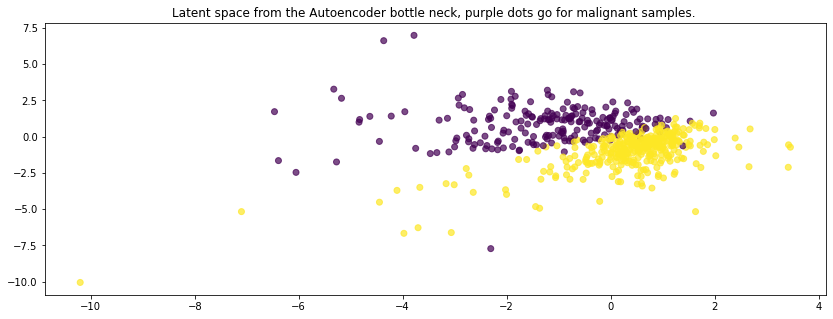

In [151]:
 ### BEGIN Solution
plt.figure(figsize=(14, 5))
net.eval()
enc = encoder(torch.Tensor(StandardScaler().fit_transform(cancer_dset['data']))).detach().numpy() # >>> your solution here <<<
plt.scatter(enc[:,0], enc[:,1], c=cancer_dset['target'], alpha=0.7);
plt.title('Latent space from the Autoencoder bottle neck, purple dots go for malignant samples. ');
 ### END Solution

### Task 8.  Autoencoder on kMNIST. (2 points)


We will build a latent representation for `kMNIST` dataset by using our AE.

1. **(1 pt.)**  Train AE to get latent representation of the `kMNIST` dataset from `sklearn.datasets()`. Follow the instructions. Use `MSE` loss and obtain < $0.035$ on validation, with AE "bottleneck"  $\leq 40$; **(sub tasks 8.1 - 8.2)**
2.  **(1 pt.)** Plot 10 images and their reconstructions 2d. **(sub tasks 8.3)**

In [20]:
from torchvision.datasets import KMNIST

data_train = KMNIST(train=True, root='./kmnist', download=True)
data_test = KMNIST(train=False, root='./kmnist', download=True)


Extracting ./kmnist/KMNIST/raw/train-images-idx3-ubyte.gz to ./kmnist/KMNIST/raw



Extracting ./kmnist/KMNIST/raw/train-labels-idx1-ubyte.gz to ./kmnist/KMNIST/raw



Extracting ./kmnist/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./kmnist/KMNIST/raw



Extracting ./kmnist/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./kmnist/KMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### 8.1 Prepare the data and necessary functions.

In [21]:
x_train = np.array(data_train.data)
y_train = np.array(data_train.targets)

x_test = np.array(data_test.data)
y_test = np.array(data_test.targets)


In [22]:
# Reshape the data and scale
#x_train = # >>> your solution here <<<
#x_test = # >>> your solution here <<<

x_train = x_train.reshape(-1, 1, 28, 28).astype('float32') / 255
x_test = x_test.reshape(-1, 1, 28, 28).astype('float32') / 255

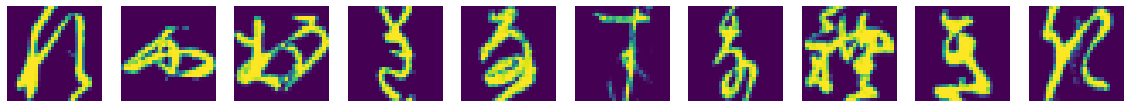

In [23]:
fig, ax = plt.subplots(ncols=10, figsize=(20, 5))
for i in range(10):
    ax[i].imshow(x_train[i].reshape(28,28));
    ax[i].axis('off')

In [24]:
# BEGIN SOLUTION (do not delete this comment!)
class kMNISTData(torch_data.Dataset):
    def __init__(self, X, y):
        super(kMNISTData, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32) #X # >>> your solution here <<<                                                        
        self.y = torch.tensor(y, dtype=torch.float32)# y # >>> your solution here <<<
    
    def __len__(self):
        len = self.X.shape[0]
        return len # >>> your solution here <<<
    
    def __getitem__(self, idx):
        xidx, yidx = self.X[idx], self.y[idx]
        return xidx, yidx # >>> your solution here <<<
    
# END Solution (do not delete this comment!)

In [25]:
train_kmnist = kMNISTData(x_train, y_train) 
test_kmnist = kMNISTData(x_test, y_test) 

#### 8.2 Create encoder and decoder network for kMNIST. 
You can either use convolutions or flatten the images and use linear layers. You can choose hidden size (not larger than 40) and any architecture you like. 

In [26]:
# BEGIN SOLUTION (do not delete this comment!)

def train(epochs, net, criterion, optimizer, train_loader, val_loader,scheduler=None, verbose=True, save_dir=None):
    
    freq = max(epochs//20,1)
    net.to(device)
    
    for epoch in range(1, epochs+1):
        net.train()

        losses_train = []
        for X, _ in train_loader:
            
            ### BEGIN Solution
            X_cuda = X.cuda() # send data to the gpu
            X_decoded = net.forward(X_cuda) # forward
            loss = criterion(X.cpu() , X_decoded.cpu()) # get loss
            optimizer.zero_grad() # zero gradient
            loss.backward() # back propagation
            losses_train.append(loss.view((-1, 1)).detach()) # append loss
            
            # Perform one step of minibatch stochastic gradient descent
            optimizer.step()

            # >>> your solution here <<<

        # define NN evaluation, i.e. turn off dropouts, batchnorms, etc.
        net.eval()

        losses_val = []
        for X, _ in val_loader:
            
            
            
            # Compute the validation loss

            # >>> your solution here <<<
            X_cuda = X.cuda() # send data to the gpu
            X_decoded = net.forward(X_cuda) # forward on the val data
            loss = criterion(X.cpu(), X_decoded.cpu()) # calculate loss on val data
            losses_val.append(loss.view((-1, 1)).detach()) # save loss

            ### END Solution

        if scheduler is not None:
            scheduler.step()
        
        if verbose and epoch%freq==0:
            mean_val = sum(losses_val)/len(losses_val)
            mean_train = sum(losses_train)/len(losses_train)

            print('Epoch {}/{} || Loss:  Train {:.4f} | Validation {:.4f}'\
                  .format(epoch, epochs, mean_train.item(), mean_val.item()))

encoder = nn.Sequential(
                        # >>> your solution here <<<
                        
                        nn.Conv2d(1, 50, 3, stride = 2, padding = 1),
                        nn.LeakyReLU(), # activation
                        nn.Conv2d(50, 25, 3, stride = 2, padding = 1),
                        nn.LeakyReLU(), # activation
                        # output convolution. Hidden size 40
                        nn.Conv2d(25, 40, 7)
                        ) 

decoder =  nn.Sequential(
                        # >>> your solution here <<<
                        # input convolution. Hidden size 40
                        nn.ConvTranspose2d(40, 25, 7),
                        nn.LeakyReLU(), # activation
                        nn.ConvTranspose2d(25, 50, 3, stride = 2, padding = 1, output_padding = 1),
                        nn.LeakyReLU(), # activation
                        nn.ConvTranspose2d(50, 1, 3, stride = 2, padding = 1, output_padding = 1),
                        nn.Sigmoid() # activation
                        ) 

# END Solution (do not delete this comment!)

In [27]:
# BEGIN SOLUTION (do not delete this comment!)

# >>> your solution here <<<
device = 'cuda:0' # choose device
net = MyFirstAE(encoder, decoder)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.01) # >>> your solution here <<<
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, 0.5) # >>> your solution here <<<
epochs = 100
# send data to  the gpu
encoder.to(device)
decoder.to(device)

train_loader = torch_data.DataLoader(train_kmnist, batch_size=500, shuffle=True) 
val_loader = torch_data.DataLoader(test_kmnist, batch_size=500, shuffle=False) 

# END Solution (do not delete this comment!)

In [28]:
train(epochs, net, criterion, optimizer, train_loader, val_loader, scheduler)

Epoch 5/100 || Loss:  Train 0.0203 | Validation 0.0245
Epoch 10/100 || Loss:  Train 0.0180 | Validation 0.0216
Epoch 15/100 || Loss:  Train 0.0168 | Validation 0.0206
Epoch 20/100 || Loss:  Train 0.0162 | Validation 0.0201
Epoch 25/100 || Loss:  Train 0.0157 | Validation 0.0197
Epoch 30/100 || Loss:  Train 0.0155 | Validation 0.0195
Epoch 35/100 || Loss:  Train 0.0152 | Validation 0.0193
Epoch 40/100 || Loss:  Train 0.0151 | Validation 0.0192
Epoch 45/100 || Loss:  Train 0.0150 | Validation 0.0191
Epoch 50/100 || Loss:  Train 0.0149 | Validation 0.0191
Epoch 55/100 || Loss:  Train 0.0148 | Validation 0.0191
Epoch 60/100 || Loss:  Train 0.0148 | Validation 0.0190
Epoch 65/100 || Loss:  Train 0.0148 | Validation 0.0190
Epoch 70/100 || Loss:  Train 0.0148 | Validation 0.0190
Epoch 75/100 || Loss:  Train 0.0147 | Validation 0.0190
Epoch 80/100 || Loss:  Train 0.0147 | Validation 0.0190
Epoch 85/100 || Loss:  Train 0.0147 | Validation 0.0190
Epoch 90/100 || Loss:  Train 0.0147 | Validation 

#### 8.3 Plot any 10 images and their reconstructions.

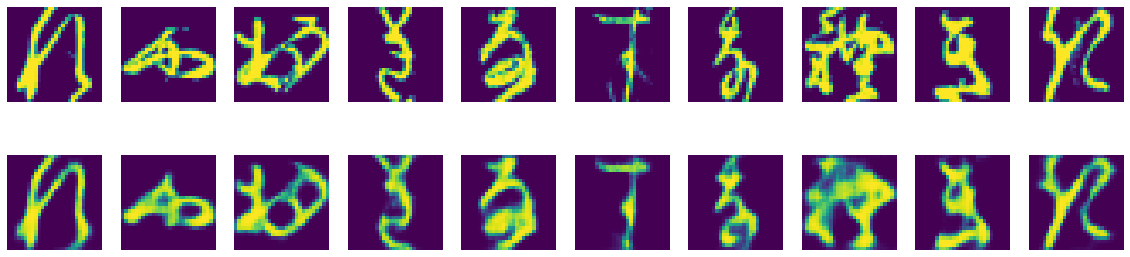

In [29]:
# BEGIN SOLUTION (do not delete this comment!)

fig, ax = plt.subplots(ncols=10, nrows=2, figsize=(20, 5))
for i in range(10):
    im = train_kmnist[i][0]
    rec = net(im.view((1, 1, 28, 28)).to(device)) # >>> your solution here <<<
    ax[0, i].imshow(im[0].reshape(28,28));
    ax[1, i].imshow(torch.Tensor(rec.reshape(28,28).detach().cpu()))   # >>> your solution here <<<);
    ax[0, i].axis('off')
    ax[1, i].axis('off')
        
# END Solution (do not delete this comment!)

## Task 9. Convolutional NN (4 points)


In this task, you will need to answer two questions and train a convolution neural network for a task of sound classification. 

- **(1 pt.)** Debug the given convolutional neural network and explain what's wrong with it and how to fix it. You will need to identify at least 4 problems; **(sub-tasks 9.1)**

- **(1 pt.)** Compute manually outputs of each layer, often when we build a neural network we need to know the output sizes of a layer before we add the next on; **(sub-tasks 9.2)**

- **(2 pt.)** Build your own convolutional NN and train it for the task of sound classification. Your goal is to achieve maximum quality > 70%  1pt and > 90% 2pt. **(sub-tasks 9.3 - 9.6)**

#### 9.1 Debug this convolutional neural network and write down proposed fixes. Ther are at least four fixes that can be applied. Explain your answers.

In [30]:
# assuming input shape [batch, 3, 32, 32]
# cnn = nn.Sequential(
#     nn.Conv2d(in_channels=1, out_channels=512, kernel_size=(3,3)),
#     nn.Conv2d(in_channels=512, out_channels=128, kernel_size=(3,3)),
#     nn.Conv2d(in_channels=128, out_channels=10, kernel_size=(3,3)),
#     nn.ReLU(),
#     nn.MaxPool2d((1,1)),
#     nn.Conv2d(in_channels=10, out_channels=3, kernel_size=(10,10)),
#     nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(10,10)),
#     nn.MaxPool2d((15,15)),
#     nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(10,10)),
#     nn.Softmax(),
#     Flatten(),
#     nn.Linear(64, 256),
#     nn.Softmax(),
#     nn.Linear(256, 10),
#     nn.Sigmoid(),
#     nn.Dropout(0.5)
    
# )

In [31]:
# BEGIN SOLUTION (do not delete this comment!)

# Your answers:

# 1. An amount of input channels in the first Conv2d layer must be equal to 3 since input shape [batch, 3, 32, 32] has 3 channels.
        # Correct option: nn.Conv2d(in_channels=3, out_channels=512, kernel_size=(3,3))
# 2. nn.MaxPool2d((1,1)) - there is no point in using maxpooling 1*1 since it is a waste of resources.
        # Correct option: to delete this line.
# 3. Size of nn.MaxPool2d((15,15)) is too high since the size of matrix in the previous layer is 8*8 pixels.
        # After 1st...5th conv2d: 30*30, 28*28, 26*26, 17*17, 8*8 pixels.
        # Correct option: lower kernel size.
# 4. Kernel size in nn.Conv2d after nn.MaxPool2d((15,15)) is too high since the size of matrix in the previous layer is lower.
        # Correct option: lower kernel size (depends on maxpool kernel size)
# 5. Softmax after convolution and linear layers. Usualluy softmax applies to the output layer. There is no point to use softmax in the middle of the architecture.
        # Correct option: to delete both softmax() layers.
# 6. Flatten() without nn.
        # Correct option: Replace: Flatten() to nn.Flatten().
# 7. Linear layer input after Flatten has not enough input.
        # Correct option:  128 * (image size from the previous layer).
# 8. nn.Dropout(0.5) - can be too high value. Better to use lower value, for instance nn.Dropout(0.1).

# END Solution (do not delete this comment!)

#### 9.2 Convolutional warm up, compute manually outpust shapes for each layer.

In [32]:
# Compute output shape for each and final layers wihout running the code.
# input size x = [8, 1 , 300, 303].

# conv1 = Conv2d(in_chаnnels=1, out_channels=16, kernel_size=(5, 5), рadding = 0, stride=2)
# conv2 = Conv2d(in_channels=16, out_chаnnels=16, kernel_size=(3, 3), рadding = 2, stride=1)
# conv3 = Conv2d(in_channels=16, out_chаnnels=16, kernel_size=(5, 5), рadding =2, stride=2)
# maxpool1 = MаxPool2d((2, 2))
# cnn = nn.Sequential(conv1, conv2, conv3, maxpool1)


In [33]:
# BEGIN SOLUTION (do not delete this comment!)

# example:

# conv1 
# output_h = (300 - 5+0) /2 +1 = 148
# output_w = (303 - 5+0) /2 +1 = 150

# Continue for all the layers:

### BEGIN Souluion

# H_out = [(Hin + 2 * pad - (kern_size - 1) - 1 ) / stride + 1]
# W_out = [(Win + 2 * pad - (kern_size - 1) - 1 ) / stride + 1]

# conv2 
# output_h = [(148 + 2 * 2 - (3 - 1) - 1 ) / 1 + 1] = 150
# output_w = [(150 + 2 * 2 - (3 - 1) - 1 ) / 1 + 1] = 152

# conv3 
# output_h = [(150 + 2 * 2 - (5 - 1) - 1) / 2 + 1] = 75
# output_w = [(152 + 2 * 2 - (5 - 1) - 1) / 2 + 1] = 76

# maxpool1 = MaxPool2d((2, 2))
# output_h = [75 / 2] = 37.5 -> round -> = 37
# output_w = [76 / 2] = 38

# final layer output = [8, 16, 37, 38]

# END Solution (do not delete this comment!)

#### 9.3 Convolutional networks for sound classication

- Now your task is to classify sounds using the convolutional network. You can use different network architectures. And your goal is to get the highest score possible.

- First of all, we will preprocess audio into spectrograms, that you will be able to treat them as images.

In [34]:
# imports

import os
import torch
import numpy as np
import torch.nn as nn
from torch import Tensor

!pip install torchaudio
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split,Dataset

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

     |████████████████████████████████| 1.9MB 6.9MB/s 


In [35]:
# Get the dataset

dataset = torchaudio.datasets.SPEECHCOMMANDS('./' , url = 'speech_commands_v0.02', 
                                       folder_in_archive= 'SpeechCommands', download = True)

### Let's look at the dataset.

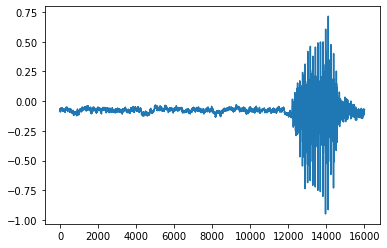

In [36]:
plt.figure()
plt.plot(dataset[0][0].t())

In [37]:
print('Label: ',dataset[11763][2])
Audio(np.array(dataset[11763][0].t()).reshape(-1), rate=16000)

Label:  down


#### Actually, we could use really long sequences to classify our samples but it's better to work with them as spectrograms so we can use convolutional layers.

Shape of spectrogram: torch.Size([1, 101, 161])


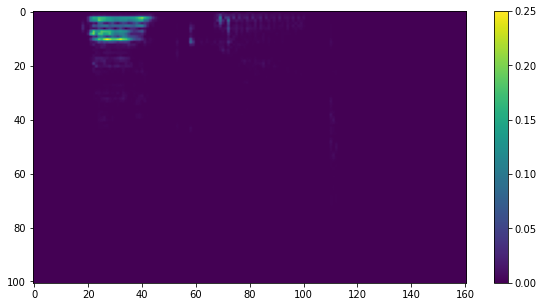

In [38]:
specgram = torchaudio.transforms.Spectrogram(n_fft=200, normalized=True)(dataset[22][0])

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize=(10,5))
plt.imshow(specgram[0,:,:].numpy());
plt.colorbar()
plt.show()


In [39]:
# Some preprocessing routine
# Filter samples only with 16000 sampling rate
# Make labels dictionary

count = 0
wave = []
labels = []
labels_dict = {}

for i in range(0,105829):
    if dataset[i][0].shape == (1,16000):
        wave.append(dataset[i][0])
        labels.append(dataset[i][2])

In [40]:
set_labels = list(set(labels))
labels_dict = {set_labels[i] :i for i in range(len(set_labels))}
labels_dict

{'backward': 34,
 'bed': 3,
 'bird': 9,
 'cat': 2,
 'dog': 22,
 'down': 29,
 'eight': 4,
 'five': 17,
 'follow': 30,
 'forward': 26,
 'four': 21,
 'go': 12,
 'happy': 31,
 'house': 5,
 'learn': 6,
 'left': 33,
 'marvin': 7,
 'nine': 15,
 'no': 32,
 'off': 13,
 'on': 25,
 'one': 10,
 'right': 11,
 'seven': 20,
 'sheila': 19,
 'six': 14,
 'stop': 24,
 'three': 27,
 'tree': 28,
 'two': 0,
 'up': 8,
 'visual': 1,
 'wow': 16,
 'yes': 23,
 'zero': 18}

#### 9.4 Your task right now is to implement a speech dataloader it will be almost the same as in the previous tasks.

In [73]:
transformation = torchaudio.transforms.Spectrogram(n_fft=200, normalized=True)

### BEGIN Solution

class SpeechDataLoader(Dataset):
    
    def __init__(self, data, labels, label_dict, transform=None):
        self.data = data
        self.labels = labels
        self.label_dict = label_dict
        self.transform = transform
            
    def __len__(self):
        return len(self.data) # >> Your code is here << #    
    
    def __getitem__(self,idx):
        waveform = self.data[idx] # >> Your code is here << #
        specgram = self.transform(waveform) # >> Your code is here << # 

        if self.labels[idx] in self.label_dict:
            label = self.label_dict[self.labels[idx]]

        return specgram, label
    
# END Solution (do not delete this comment!)

In [74]:
torch.manual_seed(0)

dataset= SpeechDataLoader(wave, labels, labels_dict, transformation)

traindata, testdata = random_split(dataset, [round(len(dataset)*.8), round(len(dataset)*.2)], )

train_loader = DataLoader(traindata, batch_size=100, shuffle=True)

val_loader = DataLoader(testdata, batch_size=100, shuffle=True)

#### 9.5 Your task is to build a convolutional neural network that  yields a high score.

In [80]:
# BEGIN Solution  (do not delete this comment!)

class NN2D(nn.Module):
    def __init__(self, num_class):
        super(NN2D,self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1,out_channels = 16,kernel_size = 3,stride = 1)
        # self.bn1 = nn.BatchNorm2d(16)
        self.dropout1 = nn.Dropout(0.25) 
    
        self.conv2 = nn.Conv2d(in_channels = 16,out_channels = 32,kernel_size = 3,stride = 1)
        # self.bn2 = nn.BatchNorm2d(32)
        self.dropout2 = nn.Dropout(0.25)
        
        self.fc1 = nn.Linear(5440, 2720)
        self.dropout3 = nn.Dropout(0.3)
        # self.bn3 = nn.BatchNorm2d(2720)

        self.fc2 = nn.Linear(2720,1360)
        self.dropout4 = nn.Dropout(0.25)
        # self.bn4 = nn.BatchNorm2d(1360)

        self.fc3 = nn.Linear(1360,720)
        self.dropout5 = nn.Dropout(0.2)
        # self.bn5 = nn.BatchNorm2d(720)

        self.fc4 = nn.Linear(720, num_class)
    
    def forward(self, x):

        out = self.conv1(x)
        # out = self.bn1(out)
        out = F.relu(out)
        out = F.max_pool2d(out,kernel_size = 3)
        out = self.dropout1(out)

        out = self.conv2(out)
        out = F.relu(out)
        # out = self.bn2(out)
        out = F.max_pool2d(out,kernel_size = 3)
        out = self.dropout2(out)

        out = out.reshape(-1, out.shape[1] * out.shape[2] * out.shape[3])
        out = self.fc1(out)
        out = F.relu(out)
        out = self.dropout3(out)
        # out = self.bn3(out)
        
        out = self.fc2(out)
        out = F.relu(out)
        out = self.dropout4(out)
        # out = self.bn4(out)

        out = self.fc3(out)
        out = F.relu(out)
        out = self.dropout5(out)
        # out = self.bn5(out)

        out = self.fc4(out)

        return out 
    
# END Solution (do not delete this comment!)

In [81]:
# BEGIN Solution  (do not delete this comment!)

net = NN2D(num_class = 35) # >> Your code is here << #    

criterion = nn.CrossEntropyLoss() # >> Your code is here << #    
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0025) # >> Your code is here << #   
num_epochs = 100
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr = 0.01, epochs = num_epochs, anneal_strategy='cos', steps_per_epoch=int(len(train_loader))) # >> Your code is here << #    

# END Solution (do not delete this comment!)

#### 9.6 Almost there, now, we need to rewrite our training loop a little bit.

In [82]:
def train(epochs, net, criterion, optimizer, train_loader, val_loader,scheduler=None, verbose=True, device='cpu'):
    net.to(device)
    freq = max(epochs//15,1)
 
    for epoch in range(1, epochs+1):
        net.train()

        losses_train = []
        for X, target in train_loader:

            X, target = X.to(device), target.to(device)
            
            ### BEGIN Solution  (do not delete this comment!)
            
            # Perform one step of minibatch stochastic gradient descent
            
            # >>> your solution here <<<

            optimizer.zero_grad()
            outputs = net.forward(X)
            loss = criterion(outputs,target)
            loss.backward()
            optimizer.step()
            losses_train.append(loss.view((-1, 1)).detach())

            # END Solution (do not delete this comment!)
            
        if scheduler is not None:
            scheduler.step()
        
        if verbose and epoch%freq==0:
            y_pred_val =  []
            y_true_val = []
            losses_val = []
            net.eval()
            for X, target in val_loader:
                X, target = X.to(device), target.to(device)
                # losses_val = []
                
                # BEGIN Solution  (do not delete this comment!)
                target_hat_val = net.forward(X)
                loss = criterion(target_hat_val, target)  
                losses_val.append(loss.view((-1, 1)).detach())
                # Compute the validation loss
                # >>> your solution here <<<
                
                
                # END Solution (do not delete this comment!)
                
                y_pred_val.extend(target_hat_val.argmax(1).tolist())
                y_true_val.extend(target.tolist())

            mean_val = sum(losses_val)/len(losses_val)
            mean_train = sum(losses_train)/len(losses_train)

            print('Val epoch {}'.format(epoch), \
              ', Loss : {:.3}'.format(mean_train.item()), \
              ', Accuracy on test: {:.3}'.format(accuracy_score(y_true_val, y_pred_val)) )

In [83]:
train(num_epochs, net, criterion, optimizer, train_loader, val_loader, scheduler, device='cuda:0')

Val epoch 6 , Loss : 1.19 , Accuracy on test: 0.692
Val epoch 12 , Loss : 0.702 , Accuracy on test: 0.793
Val epoch 18 , Loss : 0.499 , Accuracy on test: 0.828
Val epoch 24 , Loss : 0.374 , Accuracy on test: 0.833
Val epoch 30 , Loss : 0.299 , Accuracy on test: 0.848
Val epoch 36 , Loss : 0.245 , Accuracy on test: 0.848
Val epoch 42 , Loss : 0.209 , Accuracy on test: 0.85
Val epoch 48 , Loss : 0.175 , Accuracy on test: 0.853
Val epoch 54 , Loss : 0.157 , Accuracy on test: 0.856
Val epoch 60 , Loss : 0.14 , Accuracy on test: 0.856
Val epoch 66 , Loss : 0.126 , Accuracy on test: 0.856
Val epoch 72 , Loss : 0.119 , Accuracy on test: 0.858
Val epoch 78 , Loss : 0.109 , Accuracy on test: 0.856
Val epoch 84 , Loss : 0.102 , Accuracy on test: 0.862
Val epoch 90 , Loss : 0.0955 , Accuracy on test: 0.86
Val epoch 96 , Loss : 0.093 , Accuracy on test: 0.858


In [ ]:
Starting epoch 4 , Loss : 1.82 , Accuracy on test: 0.513
Starting epoch 8 , Loss : 1.5 , Accuracy on test: 0.584
Starting epoch 12 , Loss : 1.32 , Accuracy on test: 0.636
Starting epoch 16 , Loss : 1.21 , Accuracy on test: 0.675
Starting epoch 20 , Loss : 1.15 , Accuracy on test: 0.688
Starting epoch 24 , Loss : 1.02 , Accuracy on test: 0.714